In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2018/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  2714
Number of Edges:  1312869


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

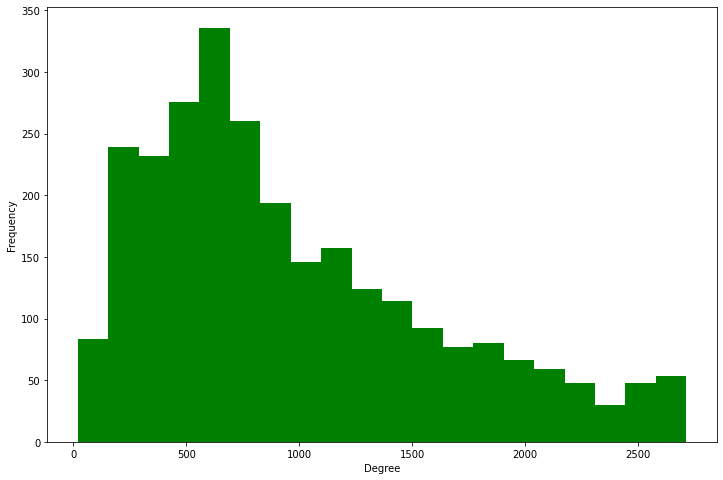

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

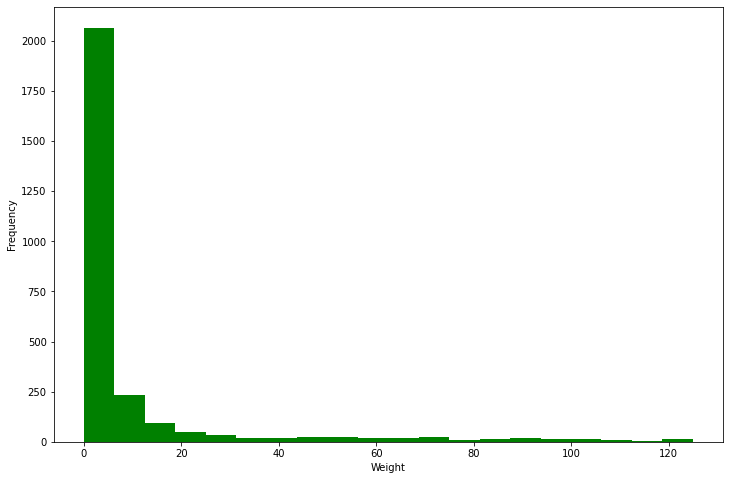

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

967.478997789241
20
2713


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

9.308094221511746
0.002740476842970678
124.93313236503138


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'document': 2713, 'location': 2713, 'var': 2713, 'window': 2713, 'name': 2712, 'init': 2711, 'length': 2709, 'null': 2705, 'top': 2703, 'self': 2703, 'parent': 2703, 'frames': 2701, 'opener': 2701, 'push': 2699, 'createElement': 2680, 'function': 2670, 'replace': 2669, 'undefined': 2669, 'call': 2668, 'setTimeout': 2667, 'Math': 2666, 'type': 2665, 'prototype': 2664, 'addEventListener': 2663, 'Date': 2660, 'string': 2660, 'navigator': 2657, 'void': 2646, 'in': 2646, 'join': 2640, 'Array': 2640, 'arguments': 2640, 'object': 2636, 'body': 2633, 'apply': 2632, 'value': 2630, 'id': 2630, 'instanceof': 2620, 'src': 2619, 'delete': 2618, 'userAgent': 2614, 'toString': 2613, 'hasOwnProperty': 2611, 'appendChild': 2610, 'slice': 2609, 'Object': 2607, 'style': 2604, 'data': 2602, 'width': 2601, 'height': 2601, 'readyState': 2593, 'splice': 2590, 'open': 2583, 'number': 2573, 'get': 2573, 'on': 2572, 'parentNode': 2568, 'removeEventListener': 2566, 'JSON': 2561, 'load': 2559, 'error': 2558, 'fa

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 124.93313236503138, 'var': 124.90887914497107, 'window': 124.86722389695791, 'name': 124.78130994793085, 'location': 124.77117018361197, 'top': 124.01836119484781, 'frames': 123.33707865168522, 'self': 123.04329953411879, 'parent': 122.8917511647025, 'opener': 122.63647574677971, 'init': 122.45519320361753, 'createElement': 120.12414360098671, 'length': 119.6586736092079, 'null': 119.56536037270506, 'src': 117.61852562345886, 'push': 115.05631679912287, 'type': 114.67374623184435, 'Date': 113.27185530282306, 'replace': 113.18566730611147, 'getElementsByTagName': 113.1608659906823, 'Math': 111.1992326664841, 'id': 111.19895861879988, 'undefined': 111.08728418744876, 'setTimeout': 110.34297067689735, 'body': 109.25404220334326, 'join': 109.11948479035368, 'prototype': 108.60975609756086, 'call': 107.66634694436829, 'function': 106.672924088792, 'addEventListener': 106.57645930391871, 'style': 106.2840504247739, 'Array': 105.9921896409972, 'href': 104.06960811181085, 'toStrin

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8244755501480951

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6433914493957829

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

32


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

1
3
156
4
4
178
3
2
2
2251
2
1
1
1
4
4
62
3
1
17
1
1
2
1
1
1
2
1
1
1
1
1


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)
